In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import  matplotlib.pyplot as plt
import statsmodels.api as sm

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


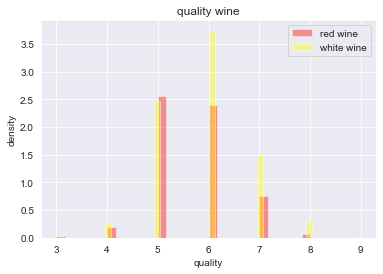

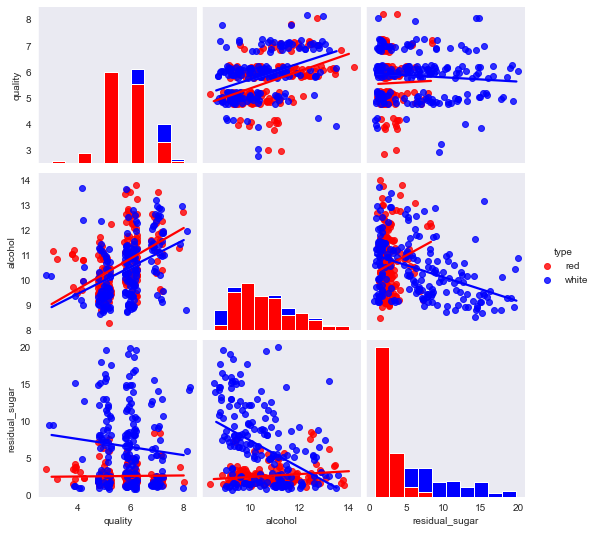

In [2]:
wine_red=pd.read_csv('winequality-red.csv',sep=';') #header=0 1행이 칼럼 이름일때 사용
wine_red['type']='red'

wine_white=pd.read_csv('winequality-white.csv',sep=';')
wine_white['type']='white'

wine=pd.concat([wine_white,wine_red])
wine.columns=wine.columns.str.replace(' ','_')  


wine_unique=wine['quality'].unique()
np.sort(wine_unique)

red_q=wine[wine['type']=='red']['quality']
white_q=wine[wine['type']=='white']['quality']
sns.set_style('darkgrid')
sns.distplot(red_q,norm_hist=True,kde=False,color='red',label='red wine')    #kde=커널밀도함수
sns.distplot(white_q,norm_hist=True,kde=False,color='yellow',label='white wine') 
 #kde는 밀도함수 
plt.title('quality wine')
plt.xlabel('quality')
plt.ylabel('density')
plt.legend()
plt.show

t_stat,p_value,df=sm.stats.ttest_ind(red_q,white_q)
wine_corr=wine.corr()
red_sample=wine[wine['type']=='red']
white_sample=wine[wine['type']=='white']

red_idx=np.random.choice(red_sample.index,replace=True,size=200)
white_idx=np.random.choice(white_sample.index,replace=True,size=200)
wine_sample=red_sample.loc[red_idx].append(white_sample.loc[white_idx])
sns.set_style('dark')
sns.pairplot(wine_sample,vars=['quality','alcohol','residual_sugar'],kind='reg',plot_kws={'ci':False,'x_jitter':0.25,'y_jitter':0.25},
             diag_kind='hist',diag_kws={'bins':10,'alpha':1},hue='type',palette=dict(red='red',white='blue',markers={'o','s'})
            )
#vars=컬럼명  hue=type -> 타입별 색상 다르게 , diag_kind='hist' 각 변수별 히스토그램

## 와인 데이터 선형회귀모델 적용 

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

wine_red=pd.read_csv('winequality-red.csv',sep=';') #header=0 1행이 칼럼 이름일때 사용
wine_red['type']='red'
wine_white=pd.read_csv('winequality-white.csv',sep=';')
wine_white['type']='white'

model=LinearRegression(fit_intercept=True,normalize=True) 

wine=pd.concat([wine_white,wine_red])
x=wine.drop(['type','quality'],axis=1)
y=wine['quality']   

x_train, x_test,y_train,y_test=train_test_split(x,y,random_state=1)

model.fit(x_train,y_train)
model.coef_
model.intercept_
newdata=np.array([6.3,0.3,0.34,1.6,0.049,14,132,0.996,3.3,0.49,9.5])
model.predict(np.reshape(newdata,(1,11)))  #데이터 1건을 이용하여 품질 예측 
y_pred=model.predict(x_test)   #데이터 셋 예측 

# def rmse(y_real,y_pred):
#     return np.sqrt(np.mean(y_real-y_pred)**2)   

np.round(np.sqrt(mean_squared_error(y_test,y_pred)),2)

0.72

In [9]:
model.intercept_

58.156308300986765

In [7]:
y_pred

array([6.17788799, 6.31236044, 5.60528094, ..., 6.88760555, 6.44868039,
       6.37757083])

### 규제가 있는 선형모델

In [149]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
model=Ridge(alpha=1) 
model.fit(x_train,y_train)
y_ped=model.predict(x_test)
np.round(np.sqrt(mean_squared_error(y_test,y_pred)),2)

0.86

In [150]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
model=Lasso(alpha=0.5) 
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
np.round(np.sqrt(mean_squared_error(y_test,y_pred)),2)

0.86